In [69]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

In [70]:
# parameters for our ODE
N_0 = 1 #initial number of cells; one in this case.
r = 0.03 # min^-1 #number of divisions PER MINUTE. 1 / 0.03 is about 33.3 minutes per division, which is quite reasonable

# parameters for integration
dt = 1 # units of minutes
total_time = 480 # units of minutes

In [71]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N_t = np.zeros(num_steps)
N_t[0] = N_0

In [72]:
# numerically integrate by looping through N_t
for t in range(1,num_steps):
    
    # first calculate dN, using pevious N_t entry
    dN = N_t[t-1] * r * dt
    
    # update current N_t entry
    N_t[t] = N_t[t-1] + dN

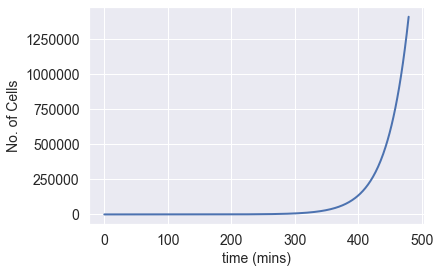

In [73]:
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N_t)
plt.xlabel("time (mins)")
plt.ylabel("No. of Cells")
# plt.yscale("log")
plt.savefig('growth_480_min.png', bbox_inches="tight")

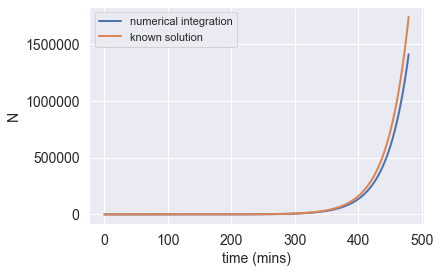

In [74]:
# compute the known solution
soln = N_0 * np.exp(r*times)

# plot both our integration and the known solution
plt.plot(times,N_t)
plt.plot(times,soln)
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])
plt.savefig('numerical_v_known.png', bbox_inches="tight")

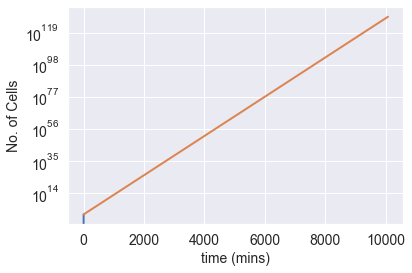

In [75]:
total_time = 10080 # min
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N_t = np.zeros(num_steps)
N_t[0] = N_0

# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N_t)
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.yscale("log")

# numerically integrate by looping through N_t
for t in range(1,num_steps):
    
    # first calculate dN, using pevious N_t entry
    dN = N_t[t-1] * r * dt
    
    # update current N_t entry
    N_t[t] = N_t[t-1] + dN
    
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N_t)
plt.xlabel("time (mins)")
plt.ylabel("No. of Cells")
plt.yscale("log")
plt.savefig('growth_10080_min.png', bbox_inches="tight")

Now, finally, I would like to plot the amount of BIOMASS on earth as a function of bacterial cells, assuming that all of the bacterial cells are consuming 3e8 carbon atoms per minute, and there are 2.9e40 carbon atoms in the entire biomass on earth.

In [205]:
# parameters for our ODE
N_0 = 1 #initial number of cells; one in this case.
r = 0.03 # min^-1 #number of divisions PER MINUTE. 1 / 0.03 is about 33.3 minutes per division, which is quite reasonable
# C_0 = 2.9e40 #starting number of carbon atoms
r_c = 3e8 # carbons consumed per minute, per cell

# parameters for integration
dt = 1 # units of minutes
total_time = 2500 # units of minutes

In [206]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N_t = np.zeros(num_steps)

N_t[0] = N_0

In [207]:
# numerically integrate by looping through N_t
for t in range(1,num_steps):
    
    # first calculate dN, using pevious N_t entry
    dN = (N_t[t-1] * r * dt)
        
    # update current N_t entry
    N_t[t] = (N_t[t-1] + dN) + r_c

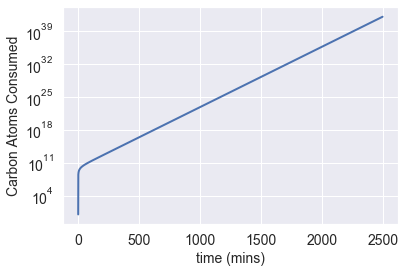

In [208]:
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N_t)
# plt.plot(times,C_t)
plt.xlabel("time (mins)")
plt.ylabel("Carbon Atoms Consumed")
plt.yscale("log")
plt.savefig('carbon_consumed_2500_min.png', bbox_inches="tight")